In [1]:
# 讀取mnist資料
from tensorflow.keras.datasets import mnist
#圖檔資料, 標籤
(train_Data, train_Label), (test_Data, test_Label) = mnist.load_data()

In [2]:
# 查看mnist資料
print('train data = ', len(train_Data))
print('test data = ', len(test_Data))

train data =  60000
test data =  10000


In [3]:
# 查看訓練資料
print('train data dim = ', train_Data.shape)
print('test data dim = ', test_Data.shape)

train data dim =  (60000, 28, 28)
test data dim =  (10000, 28, 28)


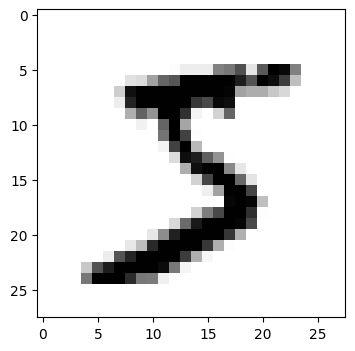

In [4]:
import matplotlib.pyplot as plt  # 資料視覺化
def plot_image(data):
    fig = plt.gcf()  # 設定顯示圖片大小
    fig.set_size_inches(4,4)
    plt.imshow(data, cmap = 'binary')  # 顯示圖片，讀出image，camp參數設為binary以黑白灰階顯示
    plt.show()  # 開始繪圖
    
plot_image(train_Data[0])  #查看第0筆影像

In [5]:
# 設置超參數與資料訓練前處裡
import tensorflow as tf
learn_rate = 0.01  # 訓練率
train_epoch = 1000  # 訓練次數
batch_size = 2000  # 訓練大小

# 將原本是28*28的影像攤平成784，未來要當作輸入特徵
train_Data_R, test_Data_R = train_Data.reshape([-1, 784]).astype('float32')\
                            ,test_Data.reshape([-1, 784]).astype('float32')
# 資料正規化至0~1之間
train_Data_R = train_Data_R/255
test_Data_R = test_Data_R/255

# 先打包合併後再打散，為了讓資料訓練權重不失衡
train_Data_M = tf.data.Dataset.from_tensor_slices((train_Data_R, train_Label))
train_Data_M = train_Data_M.shuffle(5000).batch(batch_size)

In [6]:
# 設計網路 有三種，則一即可
# 激勵函數主要是讓線性轉成非線性,有機會是負值
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  # softmax使其不為負值，確保輸出為機率值，機率值總和為1並且節點為0~9，共10個
])

In [7]:
# 優化器
optimizer = tf.keras.optimizers.SGD(learn_rate)
# 損失函數
def cross_entropy_loss(x,y):
    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    loss = scce(y,x)
    return tf.reduce_mean(loss)  # 算出平均損失

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1),  # 把1是維度的最大值Index找出
                                 tf.cast(y_true, tf.int64))  # 與真實標籤去比是否相等
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis = -1)  #算出正確率

In [ ]:
# 訓練
for epoch in range(train_epoch):
    for step, (batch_data, batch_label) in enumerate(train_Data_M):  #讓它分次訓練
        with tf.GradientTape() as tape:  # 算權重
            pred_data = model(batch_data)  # 預測值
            loss = cross_entropy_loss(pred_data, batch_label)  # 損失
            acc = accuracy(pred_data, batch_label)  # 正確率
            trainable_variables = model.trainable_variables  # 可訓練的變動參數
            
            gradient = tape.gradient(loss, trainable_variables)  #根據損失函數計算梯度
        optimizer.apply_gradients(zip(gradient, trainable_variables))
        
    Testprec = model(test_Data_R)
    Testloss = cross_entropy_loss(Testprec, test_Label)
    Testacc = accuracy(Testprec, test_Label)
    print("Testloss:%f, Testaccuracy:%f"%(Testloss, Testacc))

Testloss:2.176876, Testaccuracy:0.295700
Testloss:2.016244, Testaccuracy:0.443900
Testloss:1.826852, Testaccuracy:0.552900
Testloss:1.616043, Testaccuracy:0.632600
Testloss:1.405256, Testaccuracy:0.694000
Testloss:1.212355, Testaccuracy:0.743100
Testloss:1.048282, Testaccuracy:0.774900
Testloss:0.917425, Testaccuracy:0.795400
Testloss:0.816194, Testaccuracy:0.814000
Testloss:0.737419, Testaccuracy:0.827500
Testloss:0.675224, Testaccuracy:0.837600
Testloss:0.625127, Testaccuracy:0.846300
Testloss:0.584579, Testaccuracy:0.853800
Testloss:0.551285, Testaccuracy:0.859400
Testloss:0.523362, Testaccuracy:0.864700
Testloss:0.499692, Testaccuracy:0.869600
Testloss:0.479723, Testaccuracy:0.873700
Testloss:0.462368, Testaccuracy:0.877200
Testloss:0.447156, Testaccuracy:0.880600
Testloss:0.433935, Testaccuracy:0.882700
Testloss:0.422104, Testaccuracy:0.884900
Testloss:0.411656, Testaccuracy:0.886800
Testloss:0.402143, Testaccuracy:0.889200
Testloss:0.393512, Testaccuracy:0.891400
Testloss:0.38558